<a href="https://colab.research.google.com/github/vault5673/Support-Vector-Machines-SVM-/blob/main/Support_Vector_Machines_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Load dataset
df = pd.read_csv('/content/breast-cancer.csv')

In [7]:
# Preview data
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [8]:
# Assume the label column is named 'diagnosis' or similar; encode it if needed
# Adjust depending on actual column names
X = df.drop(columns=['diagnosis'])
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [9]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
# SVM with RBF kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma='scale')
rbf_svm.fit(X_train, y_train)
print("RBF SVM accuracy:", rbf_svm.score(X_test, y_test))

RBF SVM accuracy: 0.9824561403508771


In [12]:
# Grid search for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters from grid search:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)

Best parameters from grid search: {'C': 1, 'gamma': 'scale'}
Best cross-validation score: 0.9736263736263737


In [13]:
# Cross-validation performance
scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("Cross-validation accuracy scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation accuracy scores: [0.97368421 0.95614035 1.         0.96491228 0.97345133]
Mean CV accuracy: 0.9736376339077782


In [14]:
# Visualization using 2D PCA-reduced data
def plot_decision_boundary(clf, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title(title)
    plt.show()

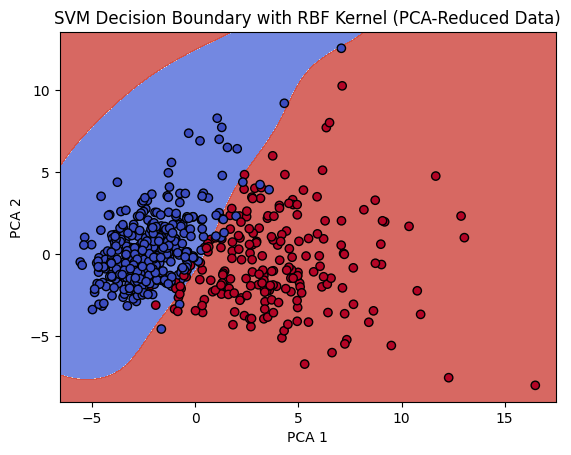

In [15]:
# Retrain best model on PCA-reduced data for visualization only
svm_vis = SVC(kernel='rbf', C=grid.best_params_['C'], gamma=grid.best_params_['gamma'])
svm_vis.fit(X_pca, y)

plot_decision_boundary(svm_vis, X_pca, y, "SVM Decision Boundary with RBF Kernel (PCA-Reduced Data)")